In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
anime_data=pd.read_csv('Anime recommendation/anime.csv')

In [3]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
anime_data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
anrat_data=pd.read_csv('Anime recommendation/rating.csv')

In [7]:
anrat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
anrat_data.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [9]:
or_data=pd.merge(anime_data,anrat_data,on='anime_id',suffixes=['','_user'])
or_data=or_data.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})

In [10]:
or_data.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [11]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

In [12]:
or_data['anime_title']=or_data['anime_title'].apply(text_cleaning)

In [13]:
or_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   anime_title  object 
 2   genre        object 
 3   type         object 
 4   episodes     object 
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ MB


In [14]:
or_data1=or_data.copy()

In [15]:
or_data1.drop(['genre', 'type', 'episodes','rating'],axis=1,inplace=True)
or_data1.columns

Index(['anime_id', 'anime_title', 'members', 'user_id', 'user_rating'], dtype='object')

In [16]:
or_data1.describe()

,anime_id,members,user_id,user_rating
count,7.813727e+06,7.813727e+06,7.813727e+06,7.813727e+06
mean,8.909045e+03,1.786208e+05,3.672795e+04,6.144036e+00
std,8.883923e+03,1.881764e+05,2.099795e+04,3.727796e+00
min,1.000000e+00,2.900000e+01,1.000000e+00,-1.000000e+00
25%,1.240000e+03,4.403000e+04,1.897400e+04,6.000000e+00
50%,6.213000e+03,1.104700e+05,3.679100e+04,7.000000e+00
75%,1.409300e+04,2.442680e+05,5.475700e+04,9.000000e+00
max,3.451900e+04,1.013917e+06,7.351600e+04,1.000000e+01


In [17]:
or_data1['user_rating'].replace({-1: np.nan},inplace=True)

In [18]:
or_data1=or_data1.dropna(axis=0,how='any')

In [19]:
or_data1.isnull().sum()

anime_id       0
anime_title    0
members        0
user_id        0
user_rating    0
dtype: int64

In [20]:
or_data1.describe()

,anime_id,members,user_id,user_rating
count,6.337239e+06,6.337239e+06,6.337239e+06,6.337239e+06
mean,8.902859e+03,1.845742e+05,3.674791e+04,7.808497e+00
std,8.881992e+03,1.909533e+05,2.101341e+04,1.572496e+00
min,1.000000e+00,3.300000e+01,1.000000e+00,1.000000e+00
25%,1.239000e+03,4.680300e+04,1.898400e+04,7.000000e+00
50%,6.213000e+03,1.170910e+05,3.681500e+04,8.000000e+00
75%,1.407500e+04,2.563250e+05,5.487300e+04,9.000000e+00
max,3.447500e+04,1.013917e+06,7.351600e+04,1.000000e+01


In [21]:
or_data1.head()

,anime_id,anime_title,members,user_id,user_rating
0,32281,Kimi no Na wa.,200630,99,5.0
1,32281,Kimi no Na wa.,200630,152,10.0
2,32281,Kimi no Na wa.,200630,244,10.0
3,32281,Kimi no Na wa.,200630,271,10.0
5,32281,Kimi no Na wa.,200630,322,10.0


In [22]:
or_data.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [23]:
#EDA

In [24]:
or_data1.describe()

,anime_id,members,user_id,user_rating
count,6.337239e+06,6.337239e+06,6.337239e+06,6.337239e+06
mean,8.902859e+03,1.845742e+05,3.674791e+04,7.808497e+00
std,8.881992e+03,1.909533e+05,2.101341e+04,1.572496e+00
min,1.000000e+00,3.300000e+01,1.000000e+00,1.000000e+00
25%,1.239000e+03,4.680300e+04,1.898400e+04,7.000000e+00
50%,6.213000e+03,1.170910e+05,3.681500e+04,8.000000e+00
75%,1.407500e+04,2.563250e+05,5.487300e+04,9.000000e+00
max,3.447500e+04,1.013917e+06,7.351600e+04,1.000000e+01


In [25]:
or_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337239 entries, 0 to 7813724
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   anime_title  object 
 2   members      int64  
 3   user_id      int64  
 4   user_rating  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 290.1+ MB


Text(0, 0.5, 'Count of ratings')

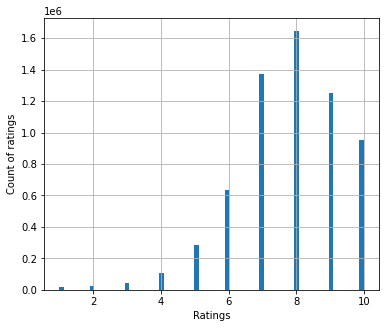

In [49]:
plt.figure(figsize=(6,5))
fig2=or_data1['user_rating'].hist(bins=70)
fig2.set_xlabel("Ratings",fontsize=10)
fig2.set_ylabel("Count of ratings",fontsize=10)

Text(0, 0.5, 'Members')

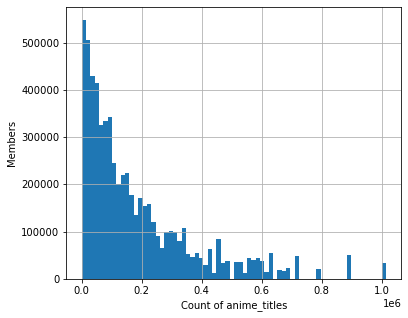

In [50]:
plt.figure(figsize=(6,5))
fig1=or_data1['members'].hist(bins=70)
fig1.set_xlabel("Count of anime_titles")
fig1.set_ylabel("Members")

In [28]:
combine = or_data1.dropna(axis = 0, subset = ['anime_title'])
ratingCount = (combine.groupby(by = ['anime_title'])['user_rating'].count().
               reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

In [29]:
top20_ratings=ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(20)

In [30]:
top20_ratings

,anime_title,user_rating
1663,Death Note,34226
8416,Sword Art Online,26310
7887,Shingeki no Kyojin,25290
1399,Code Geass: Hangyaku no Lelouch,24126
341,Angel Beats!,23565
2136,Elfen Lied,23528
6051,Naruto,22071
2356,Fullmetal Alchemist: Brotherhood,21494
2355,Fullmetal Alchemist,21332
1403,Code Geass: Hangyaku no Lelouch R2,21124


Text(0, 0.5, 'anime_title')

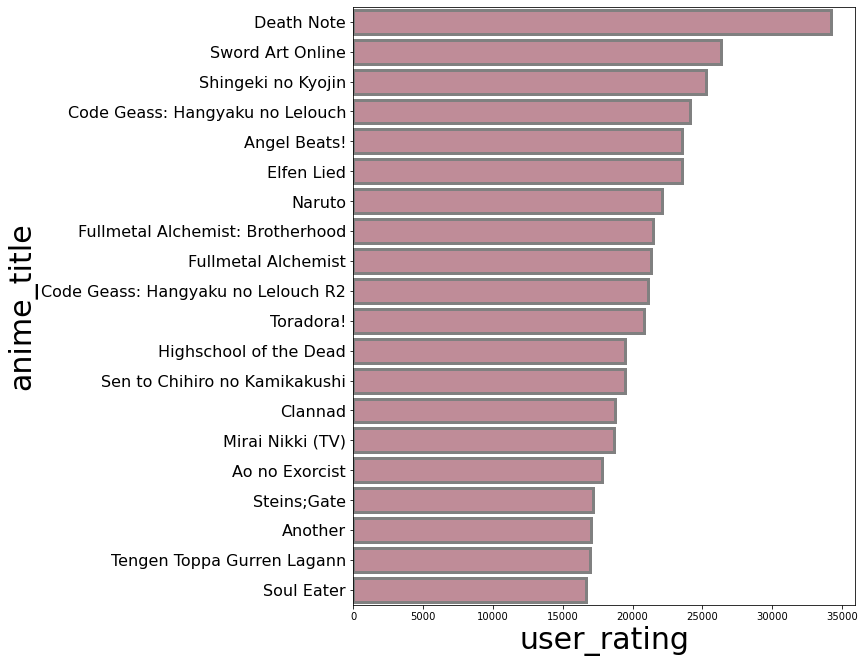

In [53]:
plt.figure(figsize=(9,11))
fig=sns.barplot(x='user_rating',y='anime_title',data=top20_ratings, linewidth=3, edgecolor=".5", facecolor=(.5, .1, .2, .5))
fig.set_yticklabels(fig.get_yticklabels(), fontsize=16)
fig.set_xlabel('user_rating',fontsize = 30) 
fig.set_ylabel('anime_title', fontsize = 30)

In [32]:
or_data1.columns

Index(['anime_id', 'anime_title', 'members', 'user_id', 'user_rating'], dtype='object')

In [33]:
anime_mat=or_data1.pivot_table(index='user_id',columns='anime_title',values='user_rating').fillna(0)

In [34]:
anime_mat.head()

anime_title,0,001,009 Re:Cyborg,009-1,009-1: RandB,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
naruto_user_ratings=anime_mat['Naruto']

In [36]:
naruto_user_ratings.head()

user_id
1    0.0
2    0.0
3    8.0
5    6.0
7    0.0
Name: Naruto, dtype: float64

In [37]:
nar_corr=anime_mat.corrwith(naruto_user_ratings)

In [38]:
corr_anime=pd.DataFrame(nar_corr,columns=['Correlation'])

In [39]:
corr_anime.sort_values('Correlation',ascending=False).head(10)

,Correlation
anime_title,
Naruto,1.000000
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,0.370816
Naruto: Shippuuden Movie 1,0.368751
Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!,0.349175
Naruto: Shippuuden Movie 2 - Kizuna,0.345329
Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo!,0.342157
Bleach,0.332318
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono,0.312798
Naruto: Shippuuden Movie 4 - The Lost Tower,0.295683


In [40]:
def anime_rec():
    anime=input('Enter anime name: ')
    anime_user_ratings=anime_mat[anime]
    anime_corr=anime_mat.corrwith(anime_user_ratings)
    corr_anime=pd.DataFrame(anime_corr,columns=['Correlation'])
    print(corr_anime.sort_values('Correlation',ascending=False).head(11))    

In [41]:
anime_rec()

Enter anime name: Naruto
                                                    Correlation
anime_title                                                    
Naruto                                                 1.000000
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shino...     0.370816
Naruto: Shippuuden Movie 1                             0.368751
Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chi...     0.349175
Naruto: Shippuuden Movie 2 - Kizuna                    0.345329
Naruto Movie 3: Dai Koufun! Mikazuki Jima no An...     0.342157
Bleach                                                 0.332318
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsug...     0.312798
Naruto: Shippuuden Movie 4 - The Lost Tower            0.295683
Dragon Ball Z                                          0.283246
Death Note                                             0.279638
